In [4]:
import numpy as np

from Solver import Solver
from data_utils.data import get_CIFAR10_data

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape
from classifiers.cnn import ThreeLayerConvNet
num_train = 100
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}




X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


In [2]:
%load_ext autoreload
%autoreload 2


from classifiers import cnn_huge as cnn

#res = cnn.ResNet()
#res.loss(data['X_train'][:num_train],data['y_train'][:num_train])
small_data['X_train'] -= np.mean(small_data['X_train'],axis=0)

In [5]:
from classifiers import cnn_huge as cnn

res = cnn.ResNet(weight_scale=1.8e-03,reg=0.5)
solver = Solver(res, small_data,
                    update_rule='adam',
                    optim_config={
                      'learning_rate': 1e-3,
                      'stride': 1
                    },
                    verbose=True,
                    num_epochs=5, batch_size=50,
                    print_every=1)

solver.train()

2
(Iteration 1 / 10) loss: 2.620324
(Epoch 0 / 5) train acc: 0.180000; val_acc: 0.119000
(Iteration 2 / 10) loss: 3.471372
(Epoch 1 / 5) train acc: 0.200000; val_acc: 0.130000
(Iteration 3 / 10) loss: 2.143543
(Iteration 4 / 10) loss: 3.082603
(Epoch 2 / 5) train acc: 0.280000; val_acc: 0.131000
(Iteration 5 / 10) loss: 2.422685
(Iteration 6 / 10) loss: 2.772205
(Epoch 3 / 5) train acc: 0.430000; val_acc: 0.156000
(Iteration 7 / 10) loss: 2.335083
(Iteration 8 / 10) loss: 1.710659
(Epoch 4 / 5) train acc: 0.470000; val_acc: 0.190000
(Iteration 9 / 10) loss: 1.915156
(Iteration 10 / 10) loss: 1.602199
(Epoch 5 / 5) train acc: 0.600000; val_acc: 0.210000


In [ ]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [4]:
from classifiers import cnn_huge as cnn

bn_solvers = {}
solvers = {}
weight_scales = np.logspace(-4, 0, num=20)
for i, weight_scale in enumerate(weight_scales):
  print 'Running weight scale %d / %d' % (i + 1, len(weight_scales))
  bn_model = cnn.ResNet(reg=0.5, weight_scale=weight_scale, use_batchnorm=True)
  #model = FullyConnectedNet(hidden_dims, weight_scale=weight_scale, use_batchnorm=False)

  bn_solver = Solver(bn_model, small_data,
                  num_epochs=10, batch_size=50,
                  update_rule='adam',
                  optim_config={
                    'learning_rate': 1e-3,
                  },
                  verbose=False, print_every=20)
  bn_solver.train()
  bn_solvers[weight_scale] = bn_solver

  #solver = Solver(model, small_data,
  #                num_epochs=10, batch_size=50,
  #                update_rule='adam',
  #                optim_config={
  #                  'learning_rate': 1e-3,
  #                },
  #                verbose=False, print_every=200)
  #solver.train()
  #solvers[weight_scale] = solver

Running weight scale 1 / 20
2
Running weight scale 2 / 20
2
Running weight scale 3 / 20
2
Running weight scale 4 / 20
2
Running weight scale 5 / 20
2
Running weight scale 6 / 20
2
Running weight scale 7 / 20
2
Running weight scale 8 / 20
2
Running weight scale 9 / 20
2
Running weight scale 10 / 20
2
Running weight scale 11 / 20
2
Running weight scale 12 / 20
2
Running weight scale 13 / 20
2
Running weight scale 14 / 20
2
Running weight scale 15 / 20
2


Layers.py:397: RuntimeWarning: divide by zero encountered in log
  loss = -(np.sum(np.log(prob[np.arange(N),y]))) / N


Running weight scale 16 / 20
2
Running weight scale 17 / 20
2
Running weight scale 18 / 20
2
Running weight scale 19 / 20
2
Running weight scale 20 / 20
2


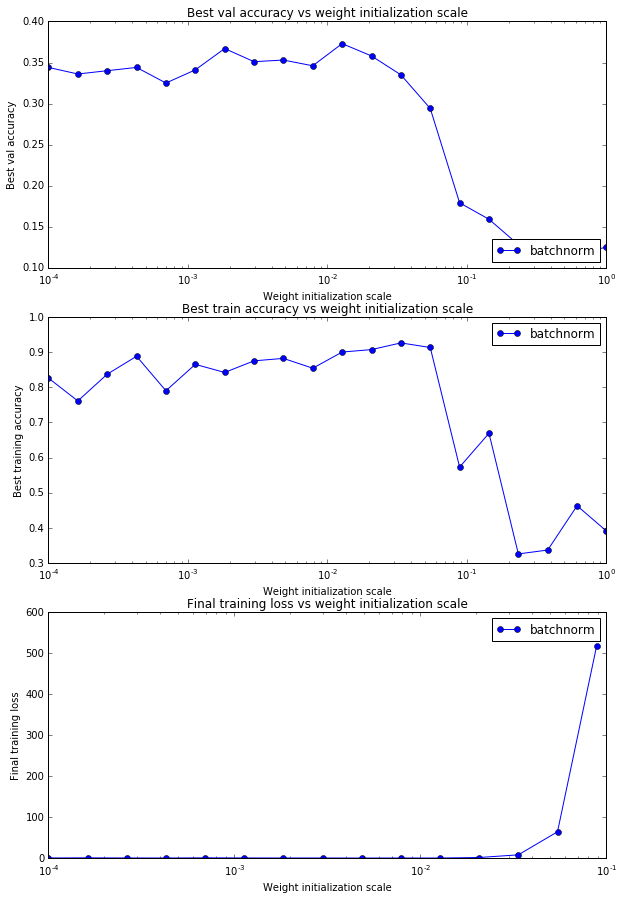

In [5]:
import matplotlib.pyplot as plt

best_train_accs, bn_best_train_accs = [], []
best_val_accs, bn_best_val_accs = [], []
final_train_loss, bn_final_train_loss = [], []

for ws in weight_scales:
  #best_train_accs.append(max(solvers[ws].train_acc_history))
  bn_best_train_accs.append(max(bn_solvers[ws].train_acc_history))
  
  #best_val_accs.append(max(solvers[ws].val_acc_history))
  bn_best_val_accs.append(max(bn_solvers[ws].val_acc_history))
  
  #final_train_loss.append(np.mean(solvers[ws].loss_history[-100:]))
  bn_final_train_loss.append(np.mean(bn_solvers[ws].loss_history[-100:]))
  
plt.subplot(3, 1, 1)
plt.title('Best val accuracy vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Best val accuracy')
#plt.semilogx(weight_scales, best_val_accs, '-o', label='baseline')
plt.semilogx(weight_scales, bn_best_val_accs, '-o', label='batchnorm')
plt.legend(ncol=2, loc='lower right')

plt.subplot(3, 1, 2)
plt.title('Best train accuracy vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Best training accuracy')
#plt.semilogx(weight_scales, best_train_accs, '-o', label='baseline')
plt.semilogx(weight_scales, bn_best_train_accs, '-o', label='batchnorm')
plt.legend()

plt.subplot(3, 1, 3)
plt.title('Final training loss vs weight initialization scale')
plt.xlabel('Weight initialization scale')
plt.ylabel('Final training loss')
#plt.semilogx(weight_scales, final_train_loss, '-o', label='baseline')
plt.semilogx(weight_scales, bn_final_train_loss, '-o', label='batchnorm')
plt.legend()

plt.gcf().set_size_inches(10, 15)
plt.show()

In [6]:
print bn_final_train_loss

[1.2755638388286108, 1.5275512339724377, 1.2625992944998934, 1.1614496680080015, 1.5654056694117151, 1.3051667355092313, 1.1835590471150068, 1.1933190746147753, 1.0484197926674885, 1.1644572034283149, 1.0947923094518854, 2.3701118697864363, 8.8613680810625493, 65.070526071725453, 518.36886400041158, inf, inf, inf, inf, inf]


In [7]:
print weight_scales


[  1.00000000e-04   1.62377674e-04   2.63665090e-04   4.28133240e-04
   6.95192796e-04   1.12883789e-03   1.83298071e-03   2.97635144e-03
   4.83293024e-03   7.84759970e-03   1.27427499e-02   2.06913808e-02
   3.35981829e-02   5.45559478e-02   8.85866790e-02   1.43844989e-01
   2.33572147e-01   3.79269019e-01   6.15848211e-01   1.00000000e+00]


In [22]:
weight_scales = np.logspace(-1.5, 0, num=1000)
print weight_scales

[ 0.03162278  0.0317323   0.0318422   0.03195248  0.03206314  0.03217418
  0.03228561  0.03239743  0.03250963  0.03262222  0.0327352   0.03284857
  0.03296234  0.0330765   0.03319105  0.033306    0.03342135  0.0335371
  0.03365325  0.0337698   0.03388676  0.03400412  0.03412189  0.03424006
  0.03435865  0.03447764  0.03459705  0.03471687  0.0348371   0.03495776
  0.03507883  0.03520031  0.03532222  0.03544456  0.03556731  0.03569049
  0.0358141   0.03593814  0.0360626   0.0361875   0.03631283  0.03643859
  0.03656479  0.03669142  0.0368185   0.03694601  0.03707397  0.03720237
  0.03733121  0.0374605   0.03759024  0.03772042  0.03785106  0.03798215
  0.0381137   0.0382457   0.03837815  0.03851107  0.03864445  0.03877828
  0.03891259  0.03904735  0.03918259  0.03931829  0.03945446  0.0395911
  0.03972822  0.03986581  0.04000388  0.04014242  0.04028145  0.04042096
  0.04056095  0.04070142  0.04084239  0.04098384  0.04112578  0.04126821
  0.04141113  0.04155455  0.04169847  0.04184289  0.0